In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit

In [37]:
GERMAN_POPULATION = 80e6
WORLD_POPULATION = 7.5e9

In [38]:
df = pd.read_csv(
    'co2_emissions_de.csv',
    index_col=0,
    comment='#',
    parse_dates=['year'],
)
df['emissions'] /= 1e3 # kt to Mt

targets_klimaplan = pd.read_csv('targets_klimaplan2050.csv', comment='#', index_col=0, parse_dates=['year'])
df = df.join(targets_klimaplan, how='outer')

prognosis_bmu = pd.read_csv('co2_prognose_2019.csv', comment='#', index_col=0, parse_dates=['year'])
df = df.join(prognosis_bmu, how='outer')

budgets = pd.read_csv('./co2_rest_budgets.csv', comment='#')
difference = (budgets['warming_preindustrial'] - budgets['warming_20062015']).mean()
budgets['warming_preindustrial'] = budgets['warming_20062015'] + difference
budgets['rest_budget'] *= 1e3 # Gt to Mt
budgets['rest_germany'] = budgets['rest_budget'] * GERMAN_POPULATION / WORLD_POPULATION
budgets.set_index('warming_preindustrial', inplace=True)
budgets

,warming_20062015,rest_budget,rest_germany
warming_preindustrial,,,
1.27,0.30,80000.0,853.333333
1.37,0.40,230000.0,2453.333333
1.47,0.50,380000.0,4053.333333
1.50,0.53,420000.0,4480.000000
1.57,0.60,530000.0,5653.333333
1.60,0.63,570000.0,6080.000000
1.67,0.70,680000.0,7253.333333
1.75,0.78,800000.0,8533.333333
1.77,0.80,830000.0,8853.333333


In [39]:
df.loc['2017-12-31', ['target_klimaplan2050', 'prognosis']] = df.loc['2017-12-31', 'emissions']
#df.loc['2050-12-31', 'prognosis'] = df.loc['2050-12-31', 'target_klimaplan2050']

df

,emissions,target_klimaplan2050,prognosis
year,,,
1990-12-31,1250.993,NaN,NaN
1991-12-31,1203.924,NaN,NaN
1992-12-31,1153.796,NaN,NaN
1993-12-31,1144.857,NaN,NaN
1994-12-31,1125.835,NaN,NaN
1995-12-31,1123.035,NaN,NaN
1996-12-31,1141.085,NaN,NaN
1997-12-31,1106.001,NaN,NaN
1998-12-31,1080.729,NaN,NaN


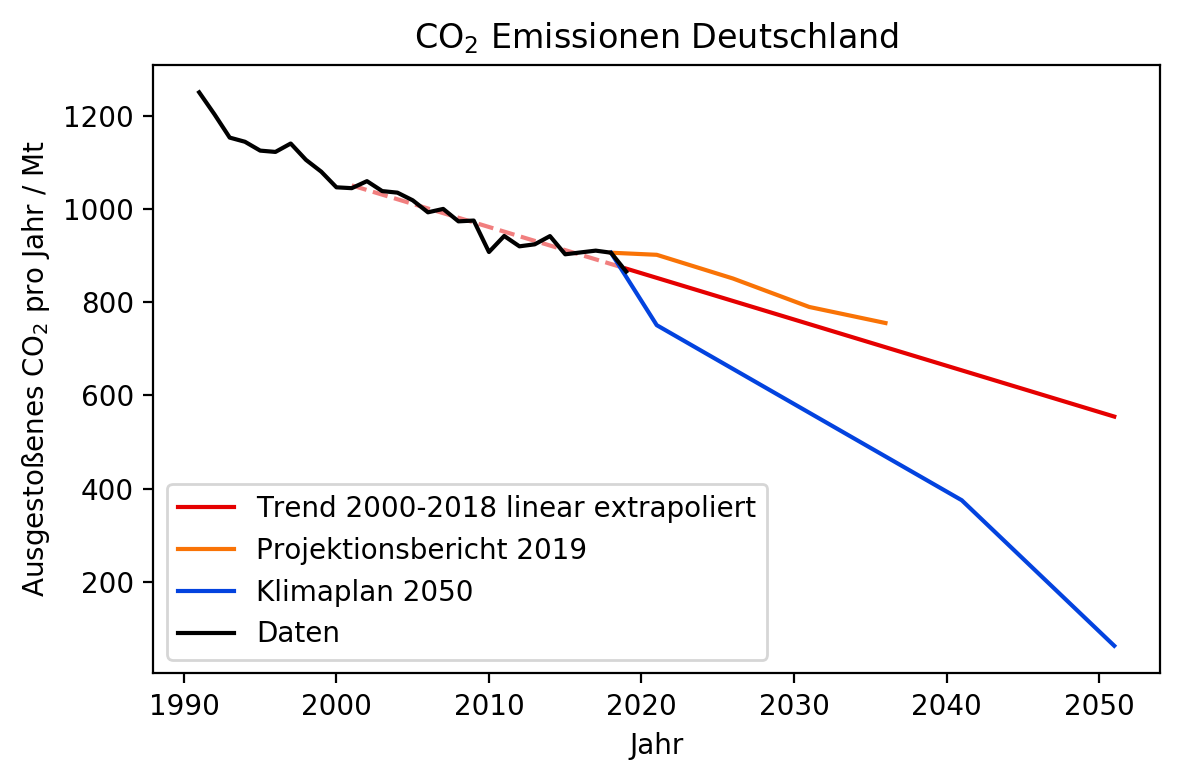

In [41]:
plt.figure(dpi=200)


y = df['emissions']['2000': '2019'].dropna()
x = y.index.year
p = Polynomial.fit(x, y, deg=1)


plt.plot(df['2018':].index, p(df['2018':].index.year), color='xkcd:red', label='Trend 2000-2018 linear extrapoliert')
plt.plot(y.index, p(x), color='xkcd:red', ls='--', alpha=0.5)


plt.plot(df['prognosis'].dropna(), label = 'Projektionsbericht 2019', color='xkcd:orange')
plt.plot(df['target_klimaplan2050'].dropna(), label='Klimaplan 2050', color='xkcd:blue')
plt.plot(df['emissions'], label = 'Daten', color='k')

# diff = (interpolated['bmu'] - interpolated['paris']).sum()

# plt.fill_between(
#     interpolated.index,
#     interpolated['paris'],
#     interpolated['bmu'],
#     label=f'Differenz: {diff:.0f} Mt', alpha=0.5, hatch='/'
# )





plt.title('CO$_2$ Emissionen Deutschland')
plt.xlabel('Jahr')
plt.ylabel('Ausgestoßenes CO$_2$ pro Jahr / Mt')
plt.legend()
plt.tight_layout()
plt.savefig('emissions.png', dpi=300)

In [42]:
df.loc['2019':, 'linear_trend'] = p(df['2019':].index.year)

for col in ('target_klimaplan2050', 'linear_trend'):
    df.loc['2017':'2018', col] = df.loc['2017':'2018', 'emissions']

In [43]:
df

,emissions,target_klimaplan2050,prognosis,linear_trend
year,,,,
1990-12-31,1250.993,NaN,NaN,NaN
1991-12-31,1203.924,NaN,NaN,NaN
1992-12-31,1153.796,NaN,NaN,NaN
1993-12-31,1144.857,NaN,NaN,NaN
1994-12-31,1125.835,NaN,NaN,NaN
1995-12-31,1123.035,NaN,NaN,NaN
1996-12-31,1141.085,NaN,NaN,NaN
1997-12-31,1106.001,NaN,NaN,NaN
1998-12-31,1080.729,NaN,NaN,NaN


In [49]:
interpolated = df.resample('1Y').interpolate()

df_rest = interpolated['2017':].cumsum()
df_rest -= df_rest.loc['2017'].values
df_rest.loc['2036':, 'prognosis'] = np.nan

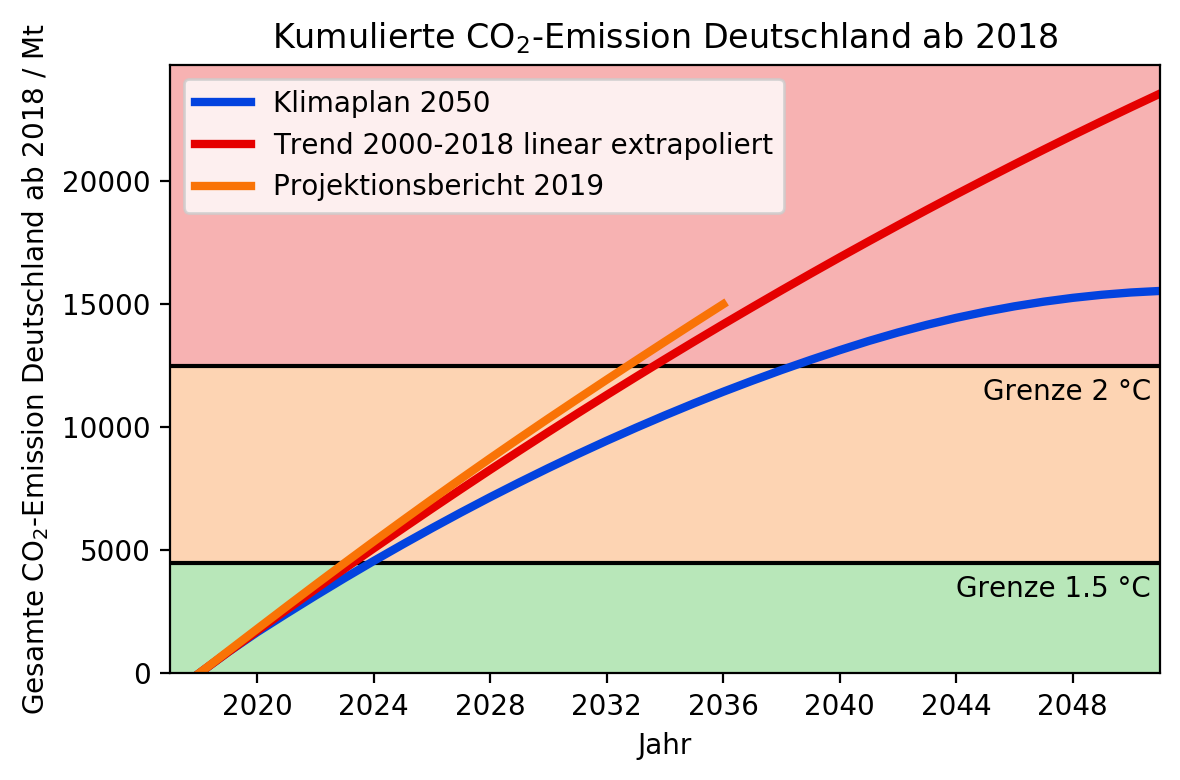

In [60]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

targets = {
    '2 °C': budgets.loc[2.0, 'rest_germany'],
    '1.5 °C': budgets.loc[1.5, 'rest_germany'],    
}

for label, target in targets.items():
    ax.axhline(target, color='k')
    ax.text(df_rest.index.max(), target - 500, 'Grenze ' + label + ' ', va='top', ha='right')

ax.plot(df_rest['target_klimaplan2050'], label='Klimaplan 2050', color='xkcd:blue', lw=3)
ax.plot(df_rest['linear_trend'], label='Trend 2000-2018 linear extrapoliert', color='xkcd:red', lw=3)
ax.plot(df_rest['prognosis'], label='Projektionsbericht 2019', color='xkcd:orange', lw=3)

ax.set_xlim('2017', '2051')
ax.set_ylim(0, None)

ax.fill_between(ax.get_xlim(), targets['2 °C'], ax.get_ylim()[1], color='xkcd:red', alpha=0.3, zorder=-1, lw=0)
ax.fill_between(ax.get_xlim(), targets['2 °C'], targets['1.5 °C'], color='xkcd:orange', alpha=0.3, zorder=-1, lw=0)
ax.fill_between(ax.get_xlim(), targets['1.5 °C'], ax.get_ylim()[0], color='xkcd:green', alpha=0.3, zorder=-1, lw=0)

ax.margins(0)

ax.legend(loc='upper left')


ax.set_title('Kumulierte CO$_2$-Emission Deutschland ab 2018')
ax.set_ylabel('Gesamte CO$_2$-Emission Deutschland ab 2018 / Mt')
ax.set_xlabel('Jahr')

fig.tight_layout()
fig.savefig('co2_restbudget.png', dpi=300)